In [201]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [206]:
#Filling 2 NA rows with "S"
df['Embarked'] = df['Embarked'].fillna('S')

In [207]:
#Cabin column has too many NA values, and we do not need it in the model
df = df.drop(columns=['Cabin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


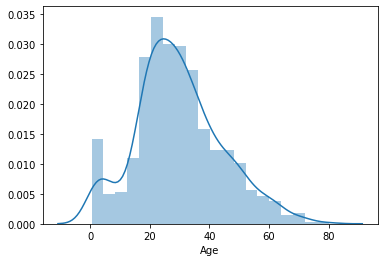

In [208]:
#Distribution of Age
sns.distplot(df[df['Age'].notnull()]['Age'])

In [209]:
# Fill NA values in Age, using linear method of Interpolation to keep ditribution the same. 
df = df.interpolate(method = "linear")

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [2]:
sns.distplot(df[df['Age'].notnull()]['Age'])

NameError: name 'sns' is not defined

In [212]:
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [213]:
#Dropping Name, PassangerID, Ticket
df = df.drop(columns=['Name', 'PassengerId', 'Ticket'])

In [214]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


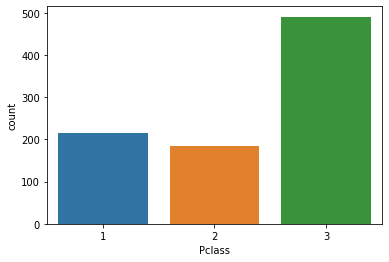

In [215]:
sns.countplot(x = 'Pclass', data = df)

/Users/bekhzodmacbook/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


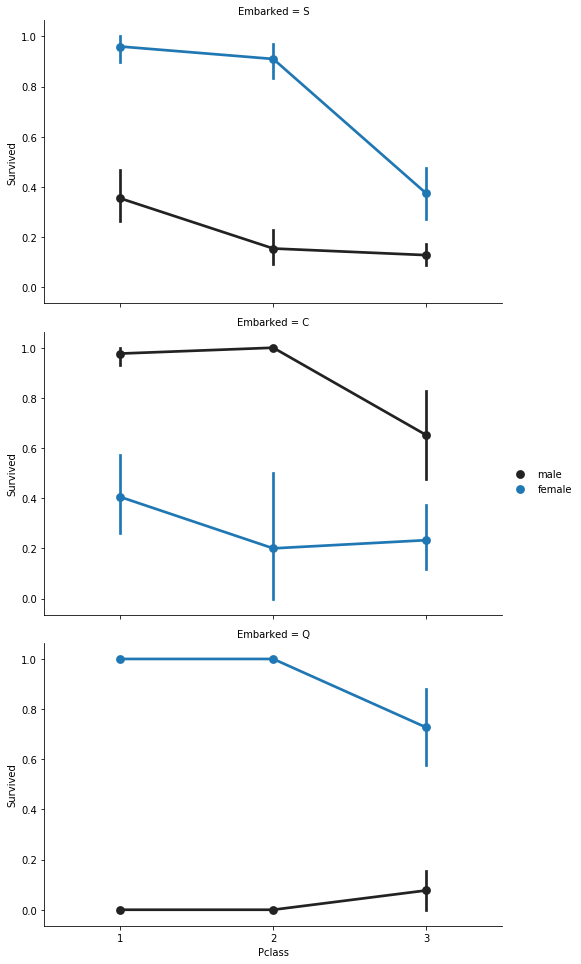

In [216]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [217]:
#Check survival statistics based on Pclass

#import seaborn as sns
#import pandas as pd
#df = pd.read_csv('train.csv')
#sns.set(style="whitegrid")
#g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
#g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
#g.set(ylim=(0, 1))


In [218]:
#Check survival statistics based on Male/Female

#import seaborn as sns
#import pandas as pd
#df = pd.read_csv('train.csv')
#h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
#h.map(sns.pointplot, color="red")
#h.set(ylim=(0, 1))

In [219]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x<16 else 0)

In [220]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


In [221]:
#Check survival statistics based on is_child?

#i = sns.PairGrid(data = df, x_vars=['is_child'], y_vars=['Survived'], size=5)
#i.map(sns.pointplot)
#i.set(ylim=(0,1))

In [222]:
#Combine # of siblings and # of parents into Family Numbers
df['Family'] = df['Parch'] + df['SibSp']

In [223]:
#Dropping Parch and SibSp
df = df.drop(columns=['Parch', 'SibSp'])

In [224]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,Family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0


/Users/bekhzodmacbook/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


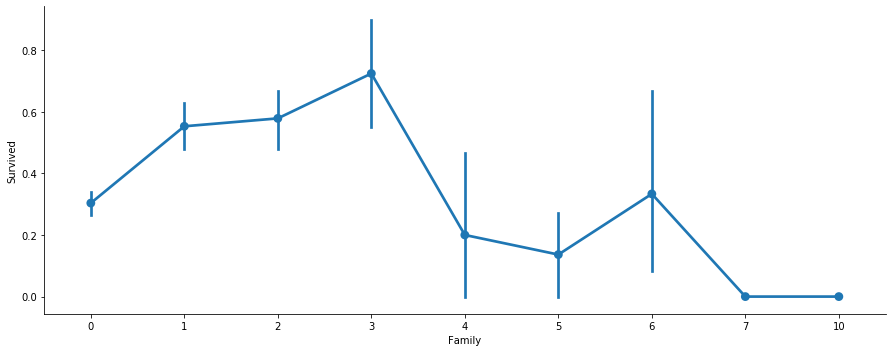

In [225]:
axes = sns.factorplot('Family','Survived', 
                      data=df, aspect = 2.5, )

In [226]:
df['is_alone'] = df['Family'].apply(lambda x: 1 if x < 1 else 0)

In [227]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [228]:
df = df.drop(['Sex'], axis = 1)

In [229]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,Family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [230]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['is'])

In [231]:
df.head()

,Survived,Pclass,Age,Fare,is_child,Family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


In [232]:
#I decided to split dataset into two, to predict survived instead of working with holdout_csv, the same thing I did in the lines below
X, y = df.drop(['Survived'], axis = 1), df['Survived']

In [233]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, shuffle = True )

In [234]:
X

,Pclass,Age,Fare,is_child,Family,is_alone,is_female,is_C,is_Q,is_S
0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,1,1,0,0
2,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,35.0,53.1000,0,1,0,1,0,0,1
4,3,35.0,8.0500,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0,1,0,0,0,1
887,1,19.0,30.0000,0,0,1,1,0,0,1
888,3,22.5,23.4500,0,3,0,1,0,0,1
889,1,26.0,30.0000,0,0,1,0,1,0,0


In [235]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [236]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [237]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 3)
print(str(acc_decision_tree))

98.736


In [238]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
acc_linear_regression = round(regressor.score(X_train, y_train)*100, 3)
print(str(acc_linear_regression))

39.288


In [239]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_logis_reg_pred = clf.predict(X_test)
acc_logis_reg = round(clf.score(X_test, y_test)*100, 3)
print(str(acc_logis_reg))

81.006


/Users/bekhzodmacbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [240]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_ran_forest_pred = clf.predict(X_test)
acc_ran_forest = round(clf.score(X_test, y_test)*100, 3)
print(str(acc_ran_forest))

83.799


In [241]:
#Stochastic Gradient Descent (SGD):
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 3)
print(str(acc_sgd))

74.157


In [242]:
#K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 3)
print(str(acc_knn))

82.022


In [243]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 3)
print(str(acc_gaussian))

79.213


In [244]:
#Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(str(acc_perceptron))

47.33


/Users/bekhzodmacbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [245]:
#Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 3)
print(str(acc_linear_svc))

78.652


/Users/bekhzodmacbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [246]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_regression, acc_linear_svc, acc_knn, acc_logis_reg, 
              acc_ran_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.736,Decision Tree
83.799,Random Forest
82.022,KNN
81.006,Logistic Regression
79.213,Naive Bayes
78.652,Support Vector Machines
74.157,Stochastic Gradient Decent
47.330,Perceptron
39.288,Linear Regression


In [247]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[369,  75],
       [ 81, 187]])

In [248]:
#F-Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7056603773584906

In [ ]:
# As we can see, Decision Tree has the highest precision output and SVM is in the middle
#Overall Scores of Decision Tree, Random Forest, KNN, LogReg are very good
#However, coming to Naive Bayes, SVM, Stochastic Gradient Decent less good but anyway its okay in our case, because
#we do not possess a lot of data
#Coming to Perceptron, and Linear Regression which did the worst results maybe because dataset was not linearly
#separable in terms of data spread across testing. 

In [ ]:
# As we can see, Decision Tree, Random Forest and Linear Regression.
#We have the highest precision output, 